In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("../data/master_grouped_ccy.csv")
df = df.drop(columns="Unnamed: 0")
df.head()

,continent,country,year,suicides_no,population,gdp_per_capita ($),s_rate
0,Europe,Albania,1987,73,2709600,796,2.69
1,Europe,Albania,1988,63,2764300,769,2.28
2,Europe,Albania,1989,68,2803100,833,2.43
3,Europe,Albania,1992,47,2822500,251,1.67
4,Europe,Albania,1993,73,2807300,437,2.60


### We want to run a linear regression between suicides rate and GDP per capita

In [3]:
df_cor = sm.add_constant(df)

In [4]:
df_cor_c = df_cor[df_cor["country"]=="Lithuania"]

In [5]:
y = df_cor_c["s_rate"]
X = df_cor_c[["const", "gdp_per_capita ($)"]]

lin_reg = sm.OLS(y,X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_rate   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     116.7
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           8.50e-10
Time:                        11:39:11   Log-Likelihood:                -51.279
No. Observations:                  22   AIC:                             106.6
Df Residuals:                      20   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 51.0660      1.106     46.159      0.000      48.758      53.374
gdp_per_capita ($)    -0.0011      0.000    -10.803      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.154   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.394
Skew:                          -0.384   Prob(JB):                        0.302
Kurtosis:                       4.422   Cond. No.                     2.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We also want to plot the correlation to help us visualize it

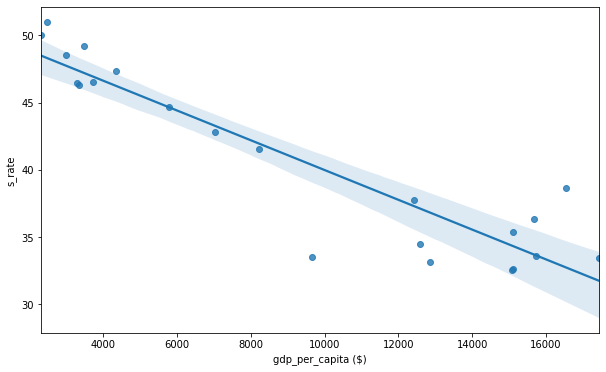

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=df_cor_c,
                x=df_cor_c["gdp_per_capita ($)"],
                y=df_cor_c["s_rate"],
                ax=ax);


### Now we use our previous codes to create two functions.

In [7]:
def gdp_suicides_plot(country):
    df_cor = sm.add_constant(df)
    df_cor_c = df_cor[df_cor["country"]==country]
  
    
    fig, ax = plt.subplots(figsize=(10,6))

    return sns.regplot(data=df_cor_c,
                x=df_cor_c["gdp_per_capita ($)"],
                y=df_cor_c["s_rate"],
                ax=ax);

def ols_results(country):
    df_cor = sm.add_constant(df)
    df_cor_c = df_cor[df_cor["country"]==country]
    y = df_cor_c["s_rate"]
    X = df_cor_c[["const", "gdp_per_capita ($)"]]

    lin_reg = sm.OLS(y,X)
    results = lin_reg.fit()
    return results.summary()

### We can now check the correlation between GPD per capita and suicides rate per country and plot that correlation simply by indicating the name of the country

In [8]:
ols_results("Republic of Korea")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_rate   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     119.1
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           8.76e-12
Time:                        11:39:11   Log-Likelihood:                -86.189
No. Observations:                  31   AIC:                             176.4
Df Residuals:                      29   BIC:                             179.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5901      1.558      2.305      0.029       0.404       6.776
gdp_per_capita ($)     0.0010   9.32e-05     10.914      0.000       0.001       0.001
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.170
Skew:                           0.587   Prob(JB):                        0.338
Kurtosis:                       2.450   Cond. No.                     3.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

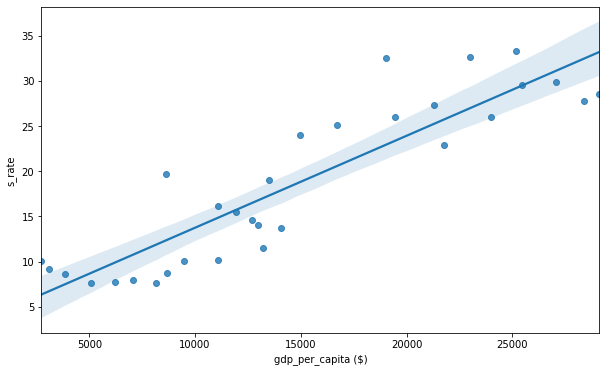

In [9]:
gdp_suicides_plot("Republic of Korea")

In [10]:
ols_results("Japan")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_rate   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.918
Date:                Thu, 30 Apr 2020   Prob (F-statistic):              0.177
Time:                        11:39:12   Log-Likelihood:                -79.225
No. Observations:                  31   AIC:                             162.5
Df Residuals:                      29   BIC:                             165.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.5101      2.505      7.390      0.000      13.387      23.633
gdp_per_capita ($)  9.274e-05    6.7e-05      1.385      0.177   -4.42e-05       0.000
==============================================================================
Omnibus:                       13.484   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.819
Skew:                          -0.181   Prob(JB):                        0.244
Kurtosis:                       1.568   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

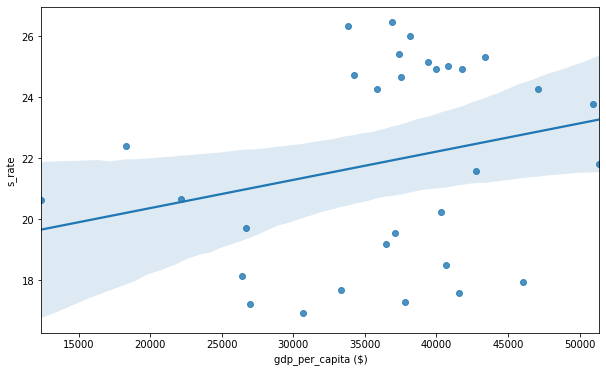

In [11]:
gdp_suicides_plot("Japan")

In [12]:
ols_results("Lithuania")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_rate   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     116.7
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           8.50e-10
Time:                        11:40:00   Log-Likelihood:                -51.279
No. Observations:                  22   AIC:                             106.6
Df Residuals:                      20   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 51.0660      1.106     46.159      0.000      48.758      53.374
gdp_per_capita ($)    -0.0011      0.000    -10.803      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.154   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.394
Skew:                          -0.384   Prob(JB):                        0.302
Kurtosis:                       4.422   Cond. No.                     2.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

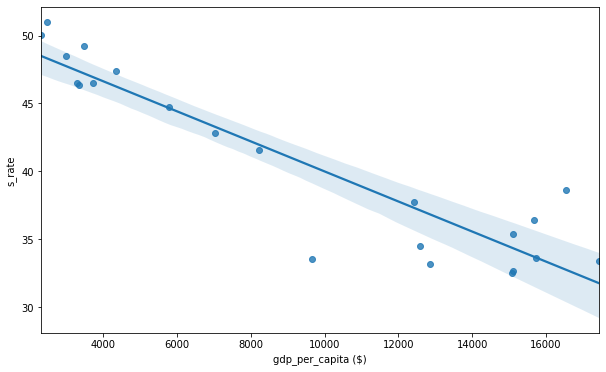

In [13]:
gdp_suicides_plot("Lithuania")

In [14]:
ols_results("Russian Federation")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_rate   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     62.30
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           3.00e-08
Time:                        11:40:49   Log-Likelihood:                -76.792
No. Observations:                  27   AIC:                             157.6
Df Residuals:                      25   BIC:                             160.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 41.3182      1.372     30.107      0.000      38.492      44.145
gdp_per_capita ($)    -0.0013      0.000     -7.893      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        4.402   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.365
Skew:                          -0.864   Prob(JB):                        0.186
Kurtosis:                       3.054   Cond. No.                     1.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

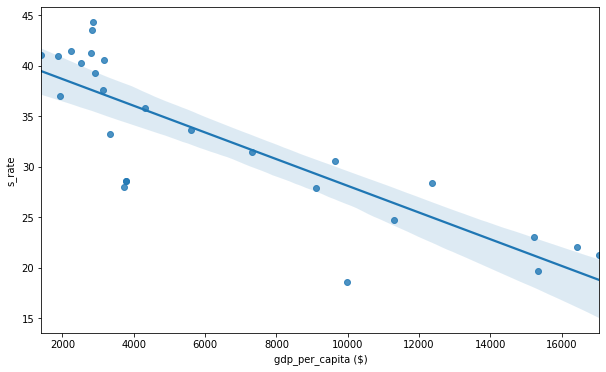

In [15]:
gdp_suicides_plot("Russian Federation")